In [31]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('comparisons.csv')

In [3]:
data.head()

,Chosen,Unchosen
0,"[0.0, 0.0, 1.0, 0.0, 5.0, 4.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 1.0, 4.0, 0.0, 0.0, 0.0, ..."
1,"[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 1.0, 0.0, 1.0, 3.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 1.0, 0.0, 2.0, 3.0, 0.0, 1.0, 0.0, 0.0, ..."
3,"[1.0, 0.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 1.0, 4.0, 1.0, 1.0, 1.0, 0.0, ...","[1.0, 0.0, 1.0, 0.0, 3.0, 1.0, 0.0, 1.0, 0.0, ..."


In [17]:
chosen = data['Chosen'].values
unchosen = data['Unchosen'].values

In [21]:
comparisons = []
for c, u in tqdm(zip(chosen, unchosen)):
    c = c[1:-1].split(', ')
    c = [float(x) for x in c]
    u = u[1:-1].split(', ')
    u = [float(x) for x in u]
    comparisons.append([c, u])

93360it [00:00, 129009.08it/s]


In [25]:
# Calculate feature differences
X = []
for match in comparisons:
    chosen_features = np.array(match[0])
    non_chosen_features = np.array(match[1])
    # Feature difference (chosen - non_chosen)
    feature_diff = chosen_features - non_chosen_features
    X.append(feature_diff)
    
X = np.array(X)

In [26]:
def bradley_terry_log_likelihood(beta, X):
    """ Compute the log-likelihood of the Bradley-Terry model.
        beta: parameters to estimate
        X: differences in features (chosen - non_chosen)
    """
    logits = np.dot(X, beta)  # Score difference
    log_likelihood = -np.sum(np.log(1 + np.exp(-logits)))  # Sum log-likelihood
    return -log_likelihood  # Negative because we minimize

In [28]:
from scipy.optimize import minimize

# Initial guess for parameters
initial_beta = np.zeros(X.shape[1])

# Minimize the negative log-likelihood
result = minimize(fun=bradley_terry_log_likelihood, x0=initial_beta, args=(X,))

print("Estimated Parameters:", result.x)

Estimated Parameters: [ 0.2012672   0.         -0.66826127 -0.5452281   0.46892579  0.
  0.05491681  0.14386619  0.23169093  0.27978648 -0.19815897 -0.17488659
  0.29417098  0.37191556 -0.15627827  0.00719334 -0.09620755 -0.34118153
  0.05128334  0.1035617   0.18456334  0.09036809  0.15879501  0.13064791
 -0.32087056 -0.36995646]


In [29]:
features = ['Intervention', 'PedPed', 'Barrier', 'CrossingSignal','NumberOfCharacters', 'DiffNumberOFCharacters','Man', 'Woman', 'Pregnant', 'Stroller','OldMan', 'OldWoman', 'Boy', 'Girl', 'Homeless', 'LargeWoman','LargeMan', 'Criminal', 'MaleExecutive', 'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat']

In [30]:
for f, p in zip(features, result.x):
    print("feature:", f, "weight:", p)

feature: Intervention weight: 0.2012672029504303
feature: PedPed weight: 0.0
feature: Barrier weight: -0.6682612703033114
feature: CrossingSignal weight: -0.5452280963740075
feature: NumberOfCharacters weight: 0.46892578831027426
feature: DiffNumberOFCharacters weight: 0.0
feature: Man weight: 0.05491680677924751
feature: Woman weight: 0.14386618976817953
feature: Pregnant weight: 0.23169092550129683
feature: Stroller weight: 0.279786477141667
feature: OldMan weight: -0.1981589662384408
feature: OldWoman weight: -0.174886594226615
feature: Boy weight: 0.29417097872714365
feature: Girl weight: 0.371915556908132
feature: Homeless weight: -0.15627827035645353
feature: LargeWoman weight: 0.0071933431171601015
feature: LargeMan weight: -0.09620754603250739
feature: Criminal weight: -0.34118153401243695
feature: MaleExecutive weight: 0.0512833360731103
feature: FemaleExecutive weight: 0.10356170080477278
feature: FemaleAthlete weight: 0.18456333712921047
feature: MaleAthlete weight: 0.090368

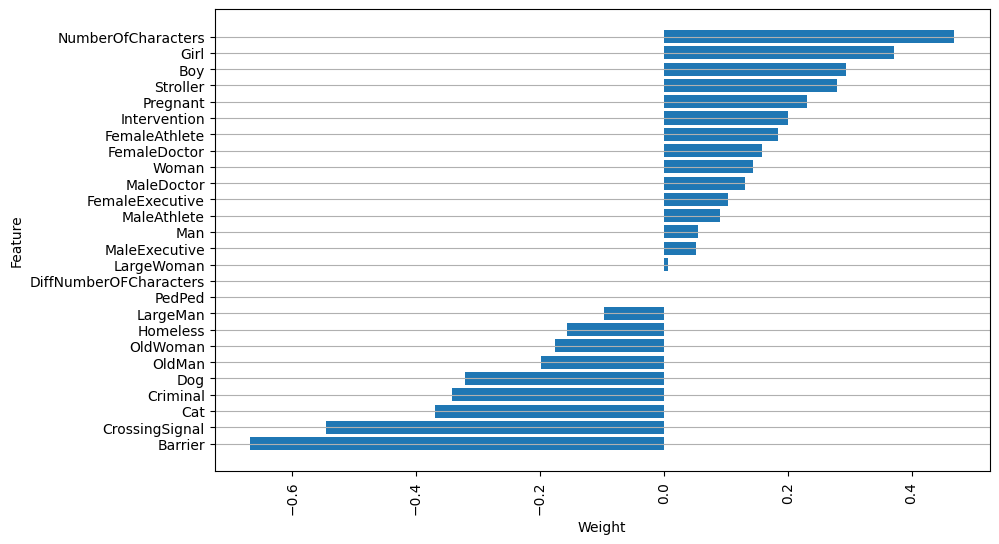

In [48]:
# make a vertical bar chart sorted by weight
sorted_idx = np.argsort(result.x)
sorted_features = np.array(features)[sorted_idx]
sorted_weights = result.x[sorted_idx]


plt.figure(figsize=(10, 6))
plt.grid(axis='y')
plt.barh(sorted_features, sorted_weights)
plt.xticks(rotation=90)
plt.ylabel('Feature')
plt.xlabel('Weight')
plt.show()

- **Intervention (0.201):** Positive weight suggests that scenarios where the AV takes action (likely swerving) are preferred over scenarios where no action is taken.
- **PedPed (0.0):** A weight of zero indicates no influence, meaning whether the scenario involves pedestrians only or mixed characters does not affect the preference.
- **Barrier (-0.668):** Negative weight suggests that scenarios where passengers are saved over pedestrians are more preferred. (passenger casualties 1, pedestrian casualties 0)
- **CrossingSignal (-0.545):** Negative weight indicates scenarios where illegal crossing is involved are less preferred. (0 no legality, 1 legal, 2 illegal)
- **NumberOfCharacters (0.469):** Positive weight suggests that scenarios with more characters involved are preferred, possibly indicating a preference for saving more lives.
- **DiffNumberOFCharacters (0.0):** No influence because the diff of the feature is always 0.
- **Man (0.055) and Woman (0.144):** Both weights are positive, with a slightly stronger preference for scenarios involving women.
- **Pregnant (0.232) and Stroller (0.280):** Strong positive weights, indicating a significant preference for saving pregnant women and babies in strollers.
- **OldMan (-0.198) and OldWoman (-0.175):** Negative weights suggest a lesser preference for scenarios where older individuals are involved.
- **Boy (0.294) and Girl (0.372):** Positive weights, with a stronger preference for saving girls over boys.
- **Homeless (-0.156):** Negative weight implies a lesser preference for outcomes involving homeless individuals.
- **LargeWoman (0.007) and LargeMan (-0.096):** A very slight positive weight for LargeWoman and a negative for LargeMan but lower than man and woman, indicating a slight preference for saving skinnier individuals.
- **Criminal (-0.341):** A significant negative weight suggests strong disfavor for saving criminals.
- **MaleExecutive (0.051) and FemaleExecutive (0.104):** Both positive, with a stronger preference for scenarios involving female executives. MaleExecutive has a lower weight than Man, but FemaleExecutive has about the same weight as woman
- **FemaleAthlete (0.185) and MaleAthlete (0.090):** Positive weights for both, with a stronger preference for saving female athletes. Both stronger than Woman and Man
- **FemaleDoctor (0.159) and MaleDoctor (0.131):** Positive weights, suggesting a preference for saving medical professionals, with a slightly higher preference for female doctors. MaleDoctor much stronger than Man, but FemaleDoctor about the same as Woman
- **Dog (-0.321) and Cat (-0.370):** Both have significant negative weights, indicating a strong disfavor for scenarios where pets are involved compared to humans.